## Implementing POC program of simple 1-NN algorithm

In [1]:
import numpy as np

class NearestNeighbour:
    def __init__(self):
        self.training_data = None
        self.training_labels = None

    # training of data onto labels
    def fit(self, X, y):
        self.X_training_data = X
        self.y_training_labels = y
    
    # testing function, classifies using helper method which finds euclidean distance
    def predict(self, X):
        predictions = []
        for point in X:
            predictions.append(self._predict_point(point))
        return predictions
    

    def _predict_point(self, point):
        distances = [self._euclidean_distance(point, x) for x in self.X_training_data]
        nearest = np.argmin(distances)

        return self.y_training_labels[nearest]

    def _euclidean_distance(self, p1, p2):
        return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

We will use test data from one of Prof. Vovk's lectures to test this simple algorithm

In [2]:
data = [(0,3),(2,2),(3,3),(-1,1),(-1,-1),(0,1)]
labels = [1, 1, 1, -1, -1, -1]

test_sample = [(1,2)]

In [3]:
nn1 = NearestNeighbour()
nn1.fit(data,labels)

The algorithm has been fit to the data above. When testing the data, we are expecting the prediction to give the test sample a label of 1 - 2,2 would be the nearest neighbour.

In [4]:
print(nn1.predict(test_sample))  

[1]


And this seems to work! We can try and print the distances it found

In [5]:
import numpy as np

class NearestNeighbour:
    def __init__(self):
        self.training_data = None
        self.training_labels = None

    # training of data onto labels
    def fit(self, X, y):
        self.X_training_data = X
        self.y_training_labels = y
    
    # testing function, classifies using helper method which finds euclidean distance
    def predict(self, X):
        predictions = []
        for point in X:
            predictions.append(self._predict_point(point))
        return predictions
    

    def _predict_point(self, point):
        distances = [self._euclidean_distance(point, x) for x in self.X_training_data]
        print(distances) #added print statement here
        nearest = np.argmin(distances)

        return self.y_training_labels[nearest]

    def _euclidean_distance(self, p1, p2):
        return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

nn1 = NearestNeighbour()
nn1.fit(data,labels)
print(nn1.predict(test_sample))  

[1.4142135623730951, 1.0, 2.23606797749979, 2.23606797749979, 3.605551275463989, 1.4142135623730951]
[1]


Here we can see the list of distances of the test to each point and we can see the second data point (2,2) has the lowest distance of 1. It's labelled as 1 so the algorithm correctly applies this label to the test data sample.

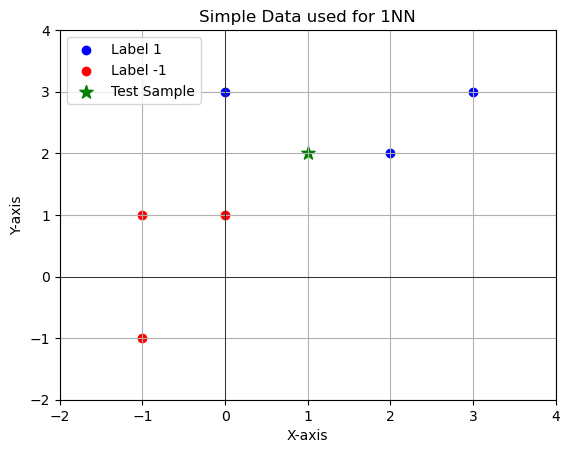

In [3]:
import matplotlib.pyplot as plt

data = [(0,3),(2,2),(3,3),(-1,1),(-1,-1),(0,1)]
labels = [1, 1, 1, -1, -1, -1]

test_sample = [(1,2)]

# Convert data to x and y for plotting
x, y = zip(*data)

# Separating data based on labels
x_pos = [xi for xi, label in zip(x, labels) if label == 1]
y_pos = [yi for yi, label in zip(y, labels) if label == 1]
x_neg = [xi for xi, label in zip(x, labels) if label == -1]
y_neg = [yi for yi, label in zip(y, labels) if label == -1]

# Plotting data points with labels 1 and -1
plt.scatter(x_pos, y_pos, color='blue', label='Label 1')
plt.scatter(x_neg, y_neg, color='red', label='Label -1')

# Plotting test sample
plt.scatter(*test_sample[0], color='green', marker='*', s=100, label='Test Sample')

# Adjusting the axis to show integer ticks
plt.xticks(range(int(min(x)) - 1, int(max(x)) + 2))
plt.yticks(range(int(min(y)) - 1, int(max(y)) + 2))

# Displaying the axis
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Data used for 1NN')
plt.grid(True)
plt.show()


Here is a visualisation of the data we've just been using for the algorithm